In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import sympy

## 1. Isotermas de Peng - Robinson

<p> Cálculo de isotermas de Van der Waals e Peng - Robinson empregando-se dados de temperatura crítica, pressão crítica e fatores acêntricos do Handbook de Engenharia Química do Perry para o etanol e água.

In [2]:
#dados de temperatura crítica e pressão crítica da água e etanol extraídos do Handbook do Perry
tcpcwh2o=[647.3, 221.2E5, 0.344] #Tc em K, Pc em Pa
tcpcwetoh=[513.92, 6.12E6, 0.643]

In [3]:
#funções para o cálculo dos parâmetros atrativo e repulsivo do modelo de Peng - Robinson
def calcabpr(t,tc,pc,w):
    r=8.31451
    b=0.0778*r*tc/pc #parâmetro repulsivo
    ac=0.45724*((r*tc)**2)/pc
    kw=0.37464+1.5422*w-0.26992*(w**2)
    tr=t/tc #temperatura reduzida
    alfa=(1+kw*(1-tr**0.5))**2
    a=ac*alfa #parâmetro atrativo
    return a,b

In [4]:
#função para o cálculo de isotermas (T=cte) com o modelo de Peng - Robinson
def calcisotpr(a,b,v,t):
    r=8.314 #constante universal dos gases em J/mol.K
    nv=len(v)
    vpr=np.zeros(nv)
    for j in range(nv):
        vpr[j]=r*t/(v[j]-b)-a/(v[j]**2+2*b*v[j]-b**2)
    return vpr

In [5]:
#vetores para plots de isotermas
n=400
vh2o=np.linspace(2.5E-5,8E-4,n)
vetoh=np.linspace(7.2E-5,1.5E-3,n)

### Isoterma de PR para a água

In [6]:
tc=tcpcwh2o[0]
pc=tcpcwh2o[1]
w=tcpcwh2o[2]
t=600
a,b=calcabpr(t,tc,pc,w) #cálculo de a e b do modelo de Peng - Robinson

In [7]:
vpprh2o=calcisotpr(a,b,vh2o,t)

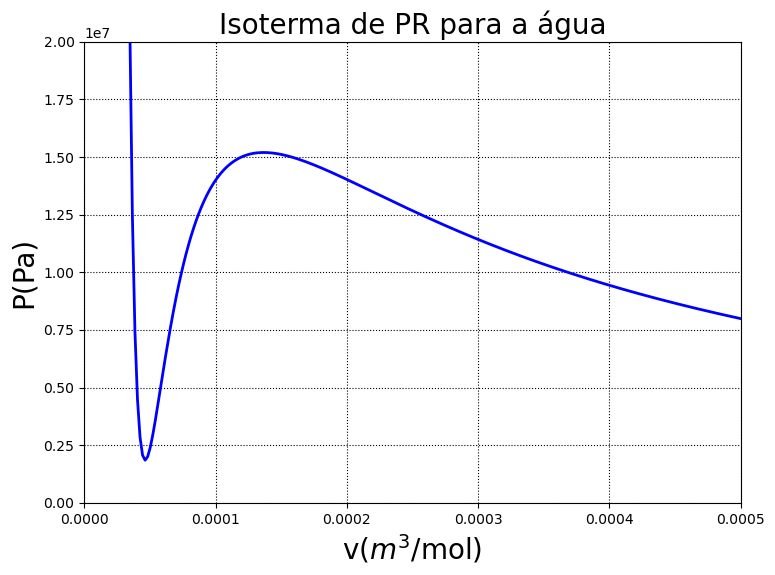

In [8]:
#Plot da isoterma de PR para a água
plt.figure(figsize=(8,6))
plt.plot(vh2o,vpprh2o,color="blue", linewidth=2)
plt.xlabel('v($m^{3}$/mol)',fontsize=20)
plt.ylabel('P(Pa)',fontsize=20)
plt.xlim([0,5E-4])
plt.ylim([0,2E7])
plt.title('Isoterma de PR para a água', fontsize = 20)
plt.rcParams.update({'font.size':15})
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('isoth2o.png',dpi=600)
plt.show()

### Isoterma de PR para o Etanol

In [9]:
tc=tcpcwetoh[0]
pc=tcpcwetoh[1]
t=500 #temperatura de interesse em K
w=tcpcwetoh[2]
a,b=calcabpr(t,tc,pc,w)

In [10]:
vppretoh=calcisotpr(a,b,vetoh,t)

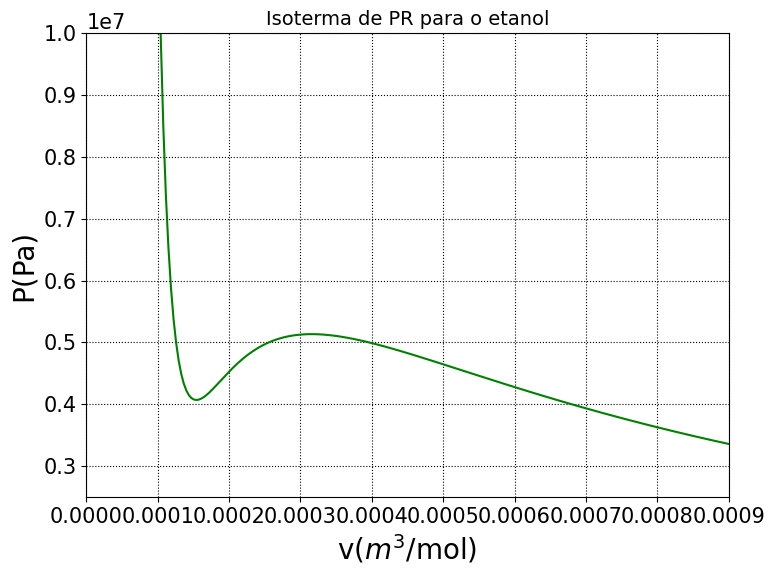

In [11]:
#Plot da isoterma de PR para a água
plt.figure(figsize=(8,6))
plt.plot(vetoh,vppretoh,color="green", linewidth=1.5)
plt.xlabel('v($m^{3}$/mol)',fontsize=20)
plt.ylabel('P(Pa)',fontsize=20)
plt.xlim([0,9E-4])
plt.ylim([0.25E7,1E7])
plt.title('Isoterma de PR para o etanol', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('isoth2o.png',dpi=600)
plt.show()

# 2. Modelagem de $P^{sat}$ via Peng - Robinson

<p> Cálculo de $P^{sat}$ como função da temperatura para substâncias puras diversas empregando-se os modelos de Antoine e Peng - Robinson.<p>
    
>- (1) Acetona
>- (2) Benzeno
>- (3) Ciclohexano
>- (4) Etanol
>- (5) Éter Dietílico
>- (6) Metanol
    
<p>Os parâmetros de Antoine foram extraídos da base de dados do NIST (https://webbook.nist.gov/chemistry/). Os valores de temperatura crítica ($T_{c}$) e pressão crítica ($P_{c}$) e fatores acêntricos dos componentes puros foram extraídos do Handbook de Engenharia Química do Perry. Os valores dos parâmetro da função alfa de Almeida e Tellez foram ajustados mediante emprego dos dados experimentais de pressãp de saturação para cada componente, os quais foram extraídos da base de dados do DDBST (https://www.ddbst.com/). <p>

### Funções para a extração de dados de arquivos txt para listas de dados

In [12]:
def CarMat(nome):    #Função para carregar uma matriz em txt
    mat = []
    with open(nome) as archivo:
        for linea in archivo:
            A = linea.split( )
            mat.append(A)
    mat = np.array(mat,dtype=object)
    return mat

def StrAFloatList(list):        #para transformar uma lista com strigns a uma lista de floats
    C = list
    B = []
    for i in range(0,len(list)):
        A = float(list[i])
        B.append(A)
    return B

def strAFloatMat(mat):          #para transformar uma matriz com strigns a uma matriz de floats
    C = mat
    B = []
    for i in range(0,len(C[:,0])):
        A = StrAFloatList(C[i,:])
        B.append(A)
    return np.array(B)

### Modelos de Peng - Robinson e Antoine

In [13]:
#Equação de estado de Peng - Robinson
def calcabpr3(t,tc,pc,w,model,palfa):
    r     = 8.314
    ac    = 0.45724*((r*tc)**2)/pc
    b     = 0.0778*r*tc/pc
    tr    = t/tc
    if (model == 'almeida'): #Função de Almeida e Tellez
        alfat = np.exp(palfa[0]*(1-tr)*(abs(1-tr)**(palfa[1]-1))+palfa[2]*(1/tr-1))
    elif (model == 'classico'):
        kw = 0.37464 + 1.54226*w - 0.26992*w**2
        alfat = (1+kw*(1-tr**0.5))**2
    elif (model == 'coquelett'): 
        c1=1.3569*(w**2)+0.9957*w+0.4077;
        c2=-11.298*(w**2)+3.559*w-0.1146;
        c3=11.7801*(w**2)-3.8901*w+0.5033;
        if (t<tc):
            alfat=np.exp(c1*(1-tr))*(((1+c2*(1-tr**0.5)**2+c3*(1-tr**0.5)**3))**2);
        else:
            alfat=np.exp(c1*(1-tr));
    a = ac*alfat
    return a,b

In [14]:
def calcpsatantoine(pa,t):
    a = pa[0]
    b = pa[1]
    c = pa[2]
    psat  = 10**(a-b/(t+c))
    psata = psat*1E5
    return psata

### Rotina para cálculo de $P^{sat}$

In [15]:
#Rotina para cálculo da pressão de saturação do Sandler
def calculaelvfipr(t,a,b,chute0):
    [zl,zv,A,B] = resolveeospr2(a,b,t,chute0)
    [fiv,fil]   = calcfipr2(A,B,zl,zv)
    r   = 8.31451
    rfi = fiv/fil
    dfi = 1-rfi
    tol = 1e-5 #tolerância
    while np.any(abs(dfi)>=tol):
        chute1 = chute0/rfi
        [zl,zv,A,B] = resolveeospr2(a,b,t,chute1)
        [fiv,fil]   = calcfipr2(A,B,zl,zv)
        rfi = fiv/fil
        dfi = 1-rfi
        chute0 = chute1
    plv = chute0
    return plv

In [16]:
#Coeficientes de fugacidade a partir do modelo de Peng - Robinson
def calcfipr2(A,B,zl,zv):
    fil = np.exp(zl-1-np.log(zl-B) + (A/(B*(2**1.5)))*np.log((zl+B*(1-2**0.5))/(zl+B*(1+2**0.5))))
    fiv = np.exp(zv-1-np.log(zv-B) + (A/(B*(2**1.5)))*np.log((zv+B*(1-2**0.5))/(zv+B*(1+2**0.5))))
    return fiv,fil

In [17]:
#Função para resolver a forma cúbica de Peng - Robinson
def resolveeospr2(a, b, t, chute):
    r    = 8.31451
    A    = a * chute / ((r * t) ** 2)
    B    = b * chute / (r * t)
    alfa = B - 1
    beta = A - 3 * (B ** 2) - 2 * B
    gama =-A * B + B ** 2 + B ** 3
    p=[1,alfa,beta,gama]
    vz=np.roots(p)
    zl=np.real(min(vz))
    zv=np.real(max(vz))
    return zl, zv, A, B

In [18]:
#Função para o cálculo de Psat em dada T via modelos de Antoine e PR
#Pressão de Antoine gera o primeiro chute para Psat
def calcPressãoPRvsAn(T, tc, pc, w, lambdaA, paA):
    tcalc   = T
    #apr     = calcabpr3(tcalc, tc, pc, w, 'classico', lambdaA)[0]
    #bpr     = calcabpr3(tcalc, tc, pc, w, 'classico', lambdaA)[1]
    apr     = calcabpr3(tcalc, tc, pc, w, 'almeida', lambdaA)[0]
    bpr     = calcabpr3(tcalc, tc, pc, w, 'almeida', lambdaA)[1]
    #apr     = calcabpr3(tcalc, tc, pc, w, 'coquelett', lambdaA)[0]
    #bpr     = calcabpr3(tcalc, tc, pc, w, 'coquelett', lambdaA)[1]
    psatA   = calcpsatantoine(paA, tcalc)
    chutepr = psatA
    psatPR  = calculaelvfipr(tcalc, apr, bpr, chutepr)
    return tcalc, psatA, psatPR

### Carregando dados de componentes puros

In [19]:
vTcPcw       = CarMat("TcPcw.txt")
Antoine      = CarMat("Antoine.txt")
Lambda       = CarMat("Lambdas.txt")
PsatAcetona  = CarMat("Psat-Acetona.txt")
PsatBenzeno  = CarMat("Psat-Benzeno.txt")
PsatCicloHex = CarMat("Psat-CicloHexano.txt")
PsatEtanol   = CarMat("Psat-Etanol.txt")
PsatEterDiet = CarMat("Psat-EterDietilico.txt")
PsatMetanol  = CarMat("Psat-Metanol.txt")

#### Modelagem de Psat para a Acetona

In [20]:
#Extraindo parâmetros das listas de dados para a acetona
pexp1 = StrAFloatList(PsatAcetona[:,1])
pexp1 = [x * 1000 for x in pexp1]

texp1 = StrAFloatList(PsatAcetona[:,0])

nexp1 = len(texp1)

tmin1 = float(PsatAcetona[0][0])
tmax1 = float(PsatAcetona[nexp1-1][0])

paA1  = StrAFloatList(Antoine[1][0:3])
Lambda1 = StrAFloatList(Lambda[1][0:3])
vTcPcw1 = StrAFloatList(vTcPcw[1][0:3])

37654.46593005426


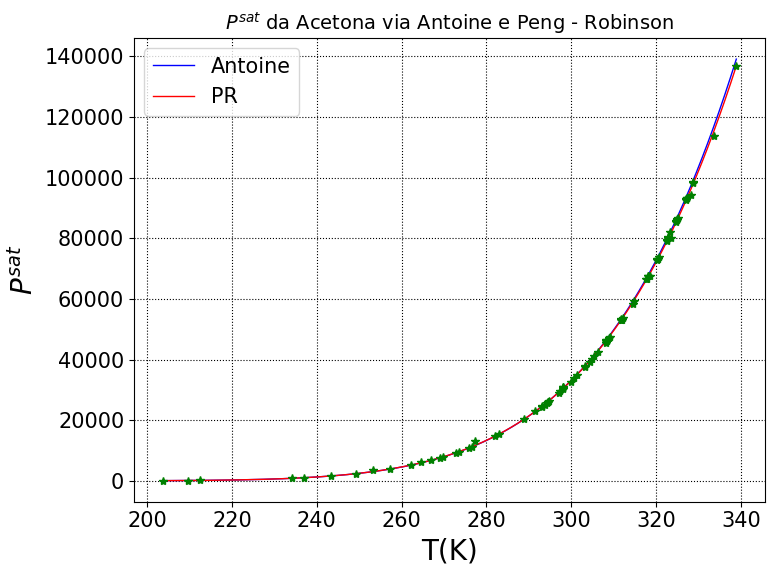

In [21]:
#Cálculo e Plot dos dados de Psat para a acetona
n = 200
tcalc1  = np.linspace(tmin1,tmax1,n)
psatA1  = np.zeros(n)
psatPR1 = np.zeros(n)

t=303.15
tcalc,psatA,psatPR = calcPressãoPRvsAn(t,vTcPcw1[0],vTcPcw1[1],vTcPcw1[2],Lambda1,paA1)
print(psatPR)

for i in range(n):
    tcalc1[i],psatA1[i],psatPR1[i] = calcPressãoPRvsAn(tcalc1[i],vTcPcw1[0],vTcPcw1[1],vTcPcw1[2],Lambda1,paA1)

plt.figure(figsize=(8,6))
plt.plot(tcalc1,psatA1,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc1,psatPR1,color="red", linewidth=1, label = 'PR')
plt.plot(texp1,pexp1,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$ ',fontsize=20)
plt.title('$P^{sat}$ da Acetona via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Acetona.png',dpi=600)
plt.show()

In [22]:
#Cálculo do desvio relativo absoluto médio
nexp1=len(texp1)

vpexp1=[float(x) for x in pexp1] #transformando lista em float

erropsatA1  = np.zeros(nexp1)
erropsatPR1 = np.zeros(nexp1)

erromedioPR=0;
erromedioA=0;

for i in range(nexp1):
    tcalc,psatA,psatPR = calcPressãoPRvsAn(texp1[i],vTcPcw1[0],vTcPcw1[1],vTcPcw1[2],Lambda1,paA1)
    erropsatA1[i]=abs(vpexp1[i]-psatA)/vpexp1[i]
    erropsatPR1[i]=abs(psatPR-vpexp1[i])/vpexp1[i]
    erromedioPR=erromedioPR+erropsatPR1[i]
    erromedioA=erromedioA+erropsatA1[i]

erromedioPR=erromedioPR/nexp1
erromedioA=erromedioA/nexp1

print('erro medio Peng - Robinson (%)=',erromedioPR)
print('erro medio Antoine (%)=',erromedioA)

erro medio Peng - Robinson (%)= 0.011229265433659666
erro medio Antoine (%)= 0.013664521737750332


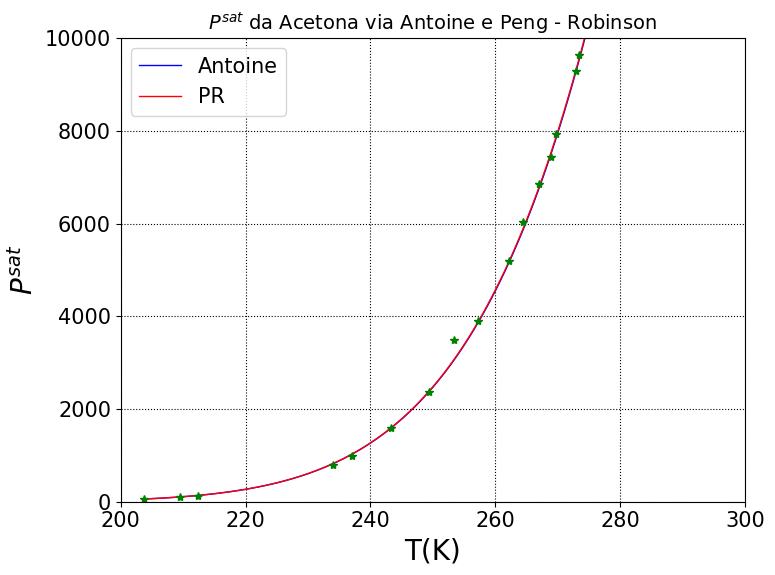

In [23]:
#comportamento em baixas temperaturas
plt.figure(figsize=(8,6))
plt.plot(tcalc1,psatA1,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc1,psatPR1,color="red", linewidth=1, label = 'PR')
plt.plot(texp1,pexp1,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$',fontsize=20)
plt.ylim([0,10000])
plt.xlim([200,300])
plt.title('$P^{sat}$ da Acetona via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Acetona - baixa T.png',dpi=600)
plt.show()

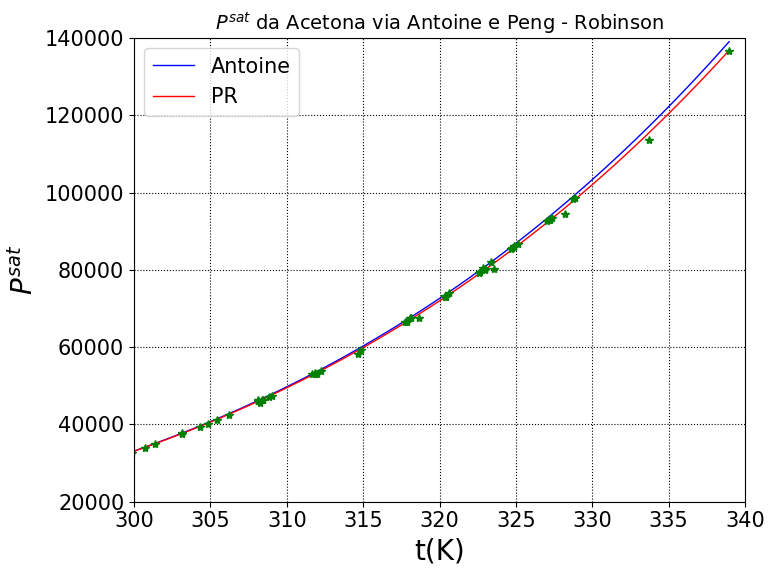

In [24]:
#comportamento em temperaturas elevadas
plt.figure(figsize=(8,6))
plt.plot(tcalc1,psatA1,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc1,psatPR1,color="red", linewidth=1, label = 'PR')
plt.plot(texp1,pexp1,color="green", marker = "*", linewidth=0)
plt.xlabel('t(K)',fontsize=20)
plt.ylabel('$P^{sat}$',fontsize=20)
plt.ylim([20000,140000])
plt.xlim([300,340])
plt.title('$P^{sat}$ da Acetona via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão saturação Acetona - T alta.png',dpi=600)
plt.show()

### Modelagem de Psat para o benzeno

In [25]:
#Extraindo parâmetros das listas de dados para o Benzeno
pexp2 = StrAFloatList(PsatBenzeno[:,1])
pexp2 = [x * 1000 for x in pexp2]

texp2 = StrAFloatList(PsatBenzeno[:,0])

nexp2 = len(texp2)

tmin2 = float(PsatBenzeno[0][0])
tmax2 = float(PsatBenzeno[nexp2-1][0])

paA2  = StrAFloatList(Antoine[2][0:3])
Lambda2 = StrAFloatList(Lambda[2][0:3])
vTcPcw2 = StrAFloatList(vTcPcw[2][0:3])

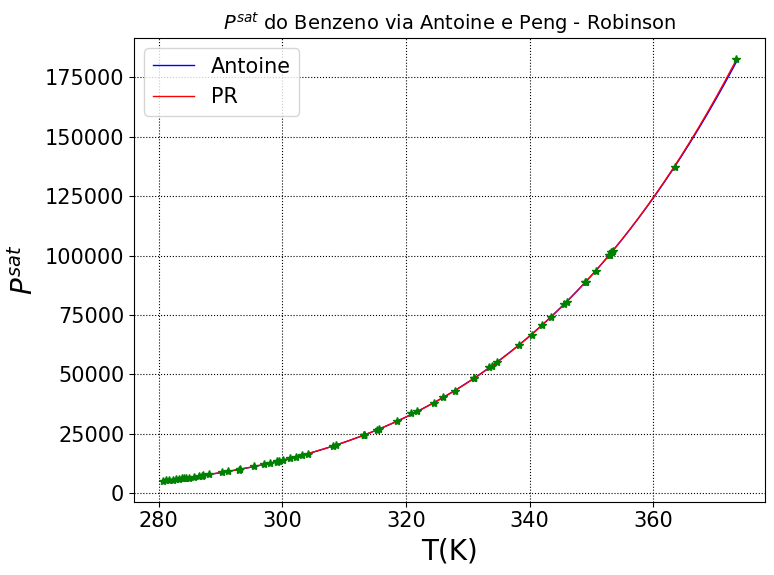

In [26]:
#Cálculo de Psat e plot para o benzeno
n = 200
tcalc2  = np.linspace(tmin2,tmax2,n)
psatA2  = np.zeros(n)
psatPR2 = np.zeros(n)
for i in range(n):
    tcalc2[i],psatA2[i],psatPR2[i] = calcPressãoPRvsAn(tcalc2[i],vTcPcw2[0],vTcPcw2[1],vTcPcw2[2],Lambda2,paA2)

plt.figure(figsize=(8,6))
plt.plot(tcalc2,psatA2,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc2,psatPR2,color="red", linewidth=1, label = 'PR')
plt.plot(texp2,pexp2,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$',fontsize=20)
plt.title('$P^{sat}$ do Benzeno via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Benzeno.png',dpi=600)
plt.show()

In [27]:
#Cálculo do desvio relativo absoluto médio
nexp2=len(texp2)

vpexp2=[float(x) for x in pexp2] #transformando lista em float

erropsatA2  = np.zeros(nexp2)
erropsatPR2 = np.zeros(nexp2)

erromedioPR=0;
erromedioA=0;

for i in range(nexp2):
    tcalc,psatA,psatPR = calcPressãoPRvsAn(texp2[i],vTcPcw2[0],vTcPcw2[1],vTcPcw2[2],Lambda2,paA2)
    erropsatA2[i]=abs(vpexp2[i]-psatA)/vpexp2[i]
    erropsatPR2[i]=abs(psatPR-vpexp2[i])/vpexp2[i]
    erromedioPR=erromedioPR+erropsatPR2[i]
    erromedioA=erromedioA+erropsatA2[i]

erromedioPR=erromedioPR/nexp2
erromedioA=erromedioA/nexp2

print('erro medio Peng - Robinson (%)=',erromedioPR)
print('erro medio Antoine (%)=',erromedioA)

erro medio Peng - Robinson (%)= 0.005187614214532175
erro medio Antoine (%)= 0.004726264376524392


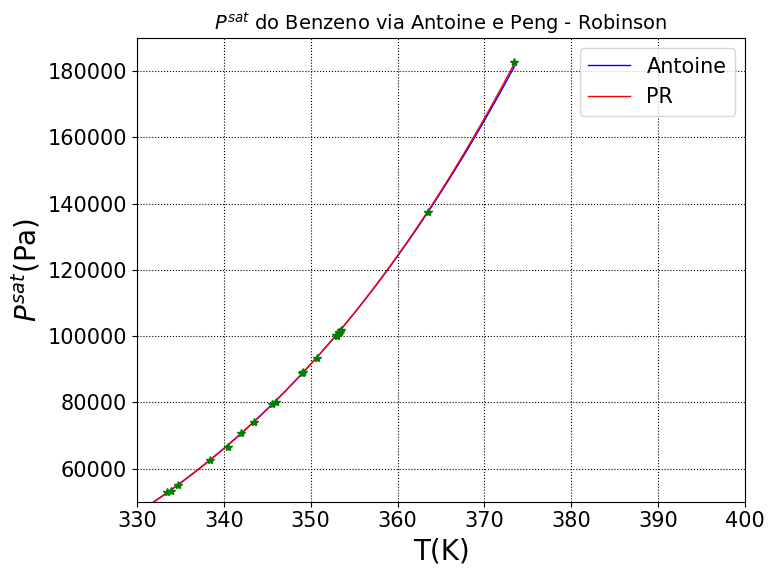

In [28]:
#Comportamento em baixas temperaturas
plt.figure(figsize=(8,6))
plt.plot(tcalc2,psatA2,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc2,psatPR2,color="red", linewidth=1, label = 'PR')
plt.plot(texp2,pexp2,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.ylim([50000,190000])
plt.xlim([330,400])
plt.title('$P^{sat}$ do Benzeno via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Benzeno - T baixa.png',dpi=600)
plt.show()

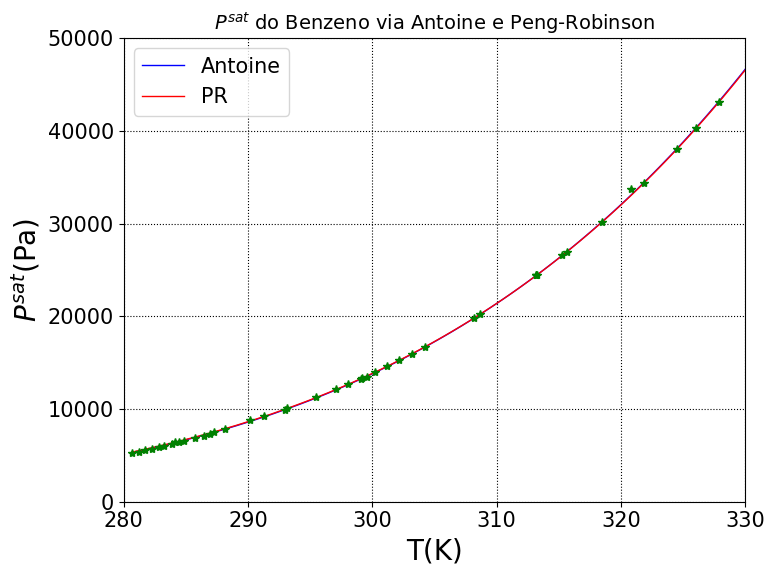

In [29]:
#Comportamento em temperaturas elevadas
plt.figure(figsize=(8,6))
plt.plot(tcalc2,psatA2,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc2,psatPR2,color="red", linewidth=1, label = 'PR')
plt.plot(texp2,pexp2,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.ylim([0,50000])
plt.xlim([280,330])
plt.title('$P^{sat}$ do Benzeno via Antoine e Peng-Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Benzeno - T alta.png',dpi=600)
plt.show()

### Modelagem de Psat do ciclo - hexano

In [30]:
#Extraindo parâmetros das listas de dados para o ciclo-hexano
pexp3 = StrAFloatList(PsatCicloHex[:,1])

pexp3 = [x * 1000 for x in pexp3]

texp3 = StrAFloatList(PsatCicloHex[:,0])

nexp3 = len(texp3)

tmin3 = float(PsatCicloHex[0][0])
tmax3 = float(PsatCicloHex[nexp3-1][0])

paA3  = StrAFloatList(Antoine[3][0:3])
Lambda3 = StrAFloatList(Lambda[3][0:3])
vTcPcw3 = StrAFloatList(vTcPcw[3][0:3])

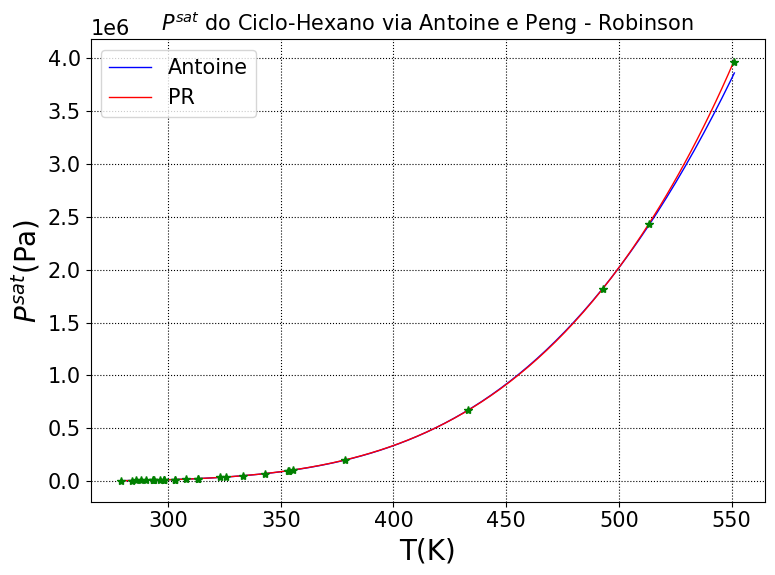

In [31]:
#Cálculo de Psat e plot para o ciclo-hexano
n = 200
tcalc3  = np.linspace(tmin3,tmax3,n)
psatA3  = np.zeros(n)
psatPR3 = np.zeros(n)
for i in range(n):
    tcalc3[i],psatA3[i],psatPR3[i] = calcPressãoPRvsAn(tcalc3[i],vTcPcw3[0],vTcPcw3[1],vTcPcw3[2],Lambda3,paA3)

plt.figure(figsize=(8,6))
plt.plot(tcalc3,psatA3,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc3,psatPR3,color="red", linewidth=1, label = 'PR')
plt.plot(texp3,pexp3,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do Ciclo-Hexano via Antoine e Peng - Robinson',fontsize =15)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Psat Ciclo Hexano.png',dpi=600)
plt.show()

In [32]:
#cálculo dos erros relativos médios
nexp3=len(texp3)

vpexp3 = [float(x) for x in pexp3]

erropsatA3  = np.zeros(nexp3)
erropsatPR3 = np.zeros(nexp3)

erromedioPR=0;
erromedioA=0;

for i in range(nexp3):
    tcalc,psatA,psatPR = calcPressãoPRvsAn(texp3[i],vTcPcw3[0],vTcPcw3[1],vTcPcw3[2],Lambda3,paA3)
    erropsatA3[i]=abs(vpexp3[i]-psatA)/vpexp3[i]
    erropsatPR3[i]=abs(psatPR-vpexp3[i])/vpexp3[i]
    erromedioPR=erromedioPR+erropsatPR3[i]
    erromedioA=erromedioA+erropsatA3[i]

erromedioPR=erromedioPR/nexp3
erromedioA=erromedioA/nexp3

print('erro medio Peng - Robinson (%)=',erromedioPR)
print('erro medio Antoine (%)=',erromedioA)

erro medio Peng - Robinson (%)= 0.004889647366960331
erro medio Antoine (%)= 0.0197393762841408


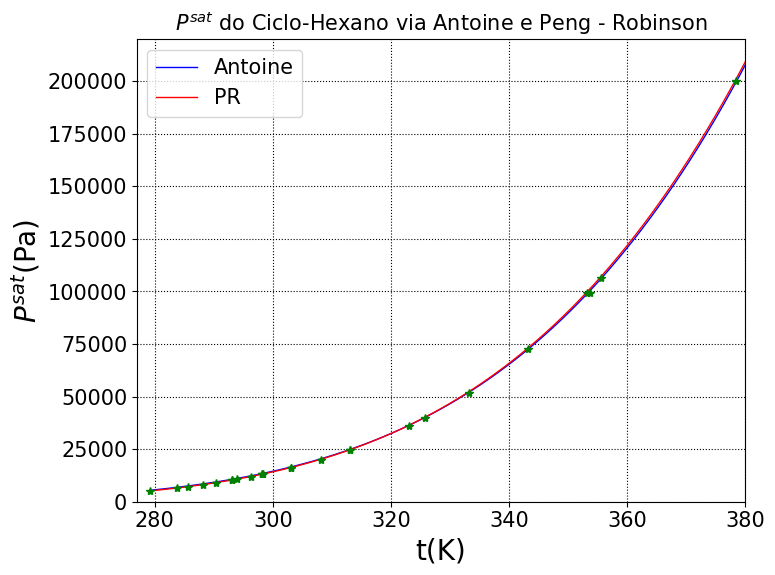

In [33]:
#Comportamento em baixas temperaturas
plt.figure(figsize=(8,6))
plt.plot(tcalc3,psatA3,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc3,psatPR3,color="red", linewidth=1, label = 'PR')
plt.plot(texp3,pexp3,color="green", marker = "*", linewidth=0)
plt.xlabel('t(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.ylim([0,0.22E6])
plt.xlim([277,380])
plt.title('$P^{sat}$ do Ciclo-Hexano via Antoine e Peng - Robinson', fontsize=15)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Psat Ciclo Hexano.png',dpi=600)
plt.show()

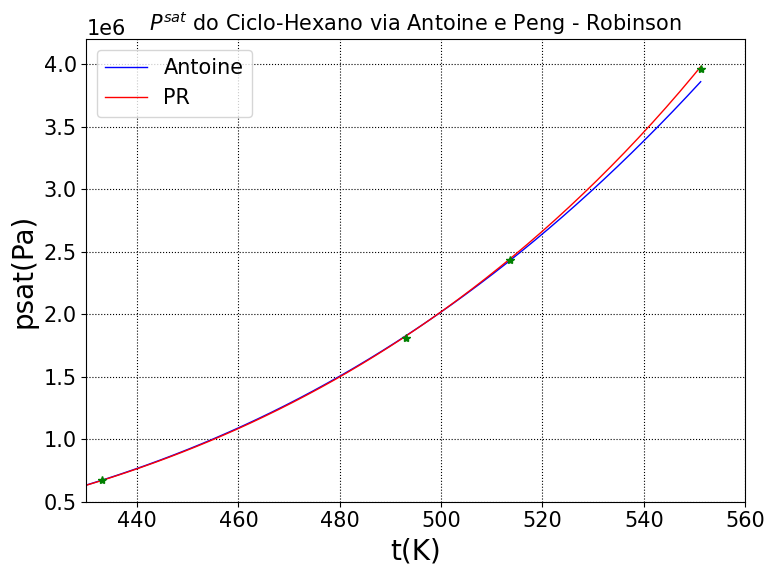

In [34]:
#Comportamento em altas temperaturas
plt.figure(figsize=(8,6))
plt.plot(tcalc3,psatA3,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc3,psatPR3,color="red", linewidth=1, label = 'PR')
plt.plot(texp3,pexp3,color="green", marker = "*", linewidth=0)
plt.xlabel('t(K)',fontsize=20)
plt.ylabel('psat(Pa)',fontsize=20)
plt.ylim([0.5E6,4.2E6])
plt.xlim([430,560])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$P^{sat}$ do Ciclo-Hexano via Antoine e Peng - Robinson',fontsize=15)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Psat Ciclo Hexano.png',dpi=600)
plt.show()

### Modelagem de Psat para o Etanol

In [35]:
#Extraindo parâmetros das listas de dados para o etanol
pexp4 = StrAFloatList(PsatEtanol[:,1])
pexp4 = [x * 1000 for x in pexp4]

texp4 = StrAFloatList(PsatEtanol[:,0])

nexp4 = len(texp4)

tmin4 = float(PsatEtanol[0][0])
tmax4 = float(PsatEtanol[nexp4-1][0])

paA4  = StrAFloatList(Antoine[4][0:3])
Lambda4 = StrAFloatList(Lambda[4][0:3])
vTcPcw4 = StrAFloatList(vTcPcw[4][0:3])

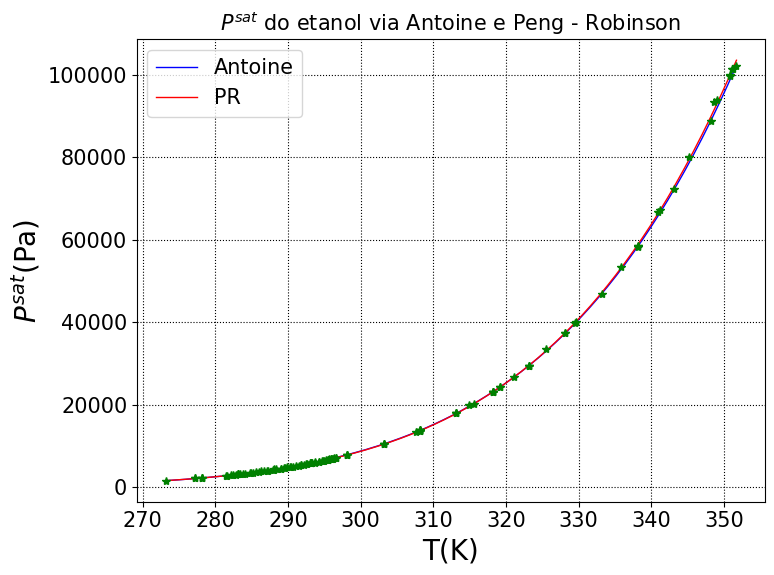

In [36]:
# Cálculo e plot de Psat do Etanol
n = 200
tcalc4  = np.linspace(tmin4,tmax4,n)
psatA4  = np.zeros(n)
psatPR4 = np.zeros(n)
for i in range(n):
    tcalc4[i],psatA4[i],psatPR4[i] = calcPressãoPRvsAn(tcalc4[i],vTcPcw4[0],vTcPcw4[1],vTcPcw4[2],Lambda4,paA4)
    
plt.figure(figsize=(8,6))
plt.plot(tcalc4,psatA4,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc4,psatPR4,color="red", linewidth=1, label = 'PR')
plt.plot(texp4,pexp4,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do etanol via Antoine e Peng - Robinson',fontsize=15)
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Etanol.png',dpi=600)
plt.show()

In [37]:
#Cálculo dos desvios relativos médios
nexp4=len(texp4)

vpexp4=[float(x) for x in pexp4] #criando um vetor numérico (string para float)

erropsatA4  = np.zeros(nexp4)
erropsatPR4 = np.zeros(nexp4)

erromedioPR=0;
erromedioA=0;

for i in range(nexp4):
    tcalc,psatA,psatPR = calcPressãoPRvsAn(texp4[i],vTcPcw4[0],vTcPcw4[1],vTcPcw4[2],Lambda4,paA4)
    erropsatA4[i]=abs(vpexp4[i]-psatA)/vpexp4[i]
    erropsatPR4[i]=abs(psatPR-vpexp4[i])/vpexp4[i]
    erromedioPR=erromedioPR+erropsatPR4[i]
    erromedioA=erromedioA+erropsatA4[i]

erromedioPR=erromedioPR/nexp4
erromedioA=erromedioA/nexp4

print('erro medio Peng - Robinson (%)=',erromedioPR)
print('erro medio Antoine (%)=',erromedioA)

erro medio Peng - Robinson (%)= 0.005555151827791495
erro medio Antoine (%)= 0.007687155962080877


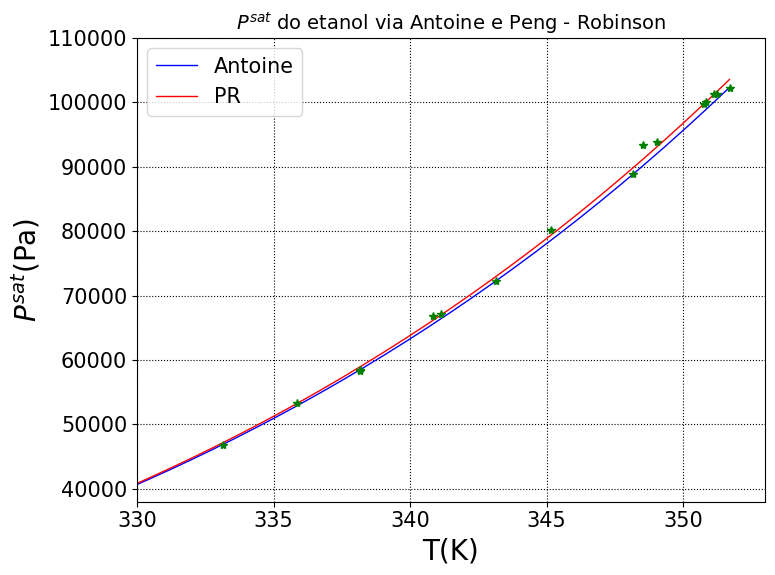

In [38]:
#Comportamento em temperaturas elevadas
plt.figure(figsize=(8,6))
plt.plot(tcalc4,psatA4,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc4,psatPR4,color="red", linewidth=1, label = 'PR')
plt.plot(texp4,pexp4,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.ylim([38000,110000])
plt.xlim([330,353])
plt.title('$P^{sat}$ do etanol via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão sat Etanol - T alta.png',dpi=600)
plt.show()

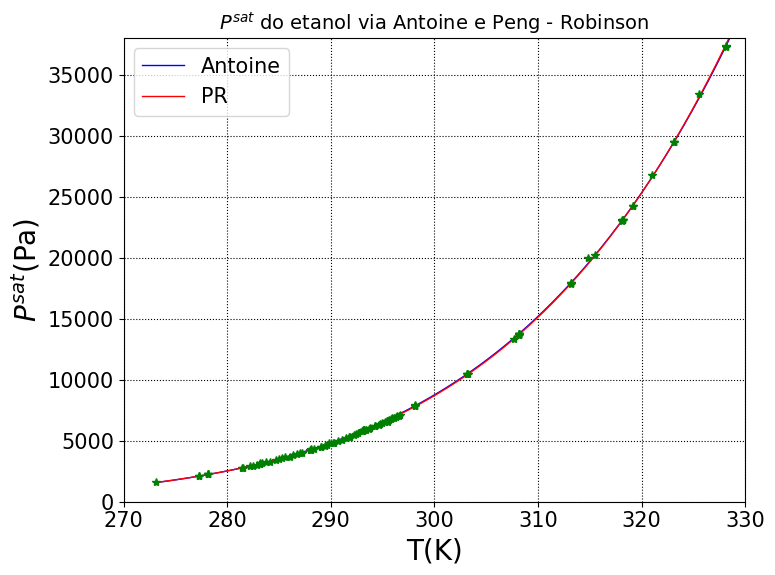

In [39]:
#Comportamento em baixas temperaturas
plt.figure(figsize=(8,6))
plt.plot(tcalc4,psatA4,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc4,psatPR4,color="red", linewidth=1, label = 'PR')
plt.plot(texp4,pexp4,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.ylim([0,38000])
plt.xlim([270,330])
plt.title('$P^{sat}$ do etanol via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão sat Etanol - T baixa.png',dpi=600)
plt.show()

In [40]:
#Cálculo de Psat em pressões ainda mais elevadas. Inserir dados de pressões mais elevadas e calcular
#o diagrama P - T próximo do ponto crítico.

### Modelagem de dados do dietil - éter

In [41]:
#Extraindo parâmetros das listas de dados para o dietil-éter
pexp5 = StrAFloatList(PsatEterDiet[:,1])
pexp5 = [x * 1000 for x in pexp5]

texp5 = StrAFloatList(PsatEterDiet[:,0])

nexp5 = len(texp5)

tmin5 = float(PsatEterDiet[0][0])
tmax5 = float(PsatEterDiet[nexp5-1][0])

paA5  = StrAFloatList(Antoine[5][0:3])
Lambda5 = StrAFloatList(Lambda[5][0:3])
vTcPcw5 = StrAFloatList(vTcPcw[5][0:3])

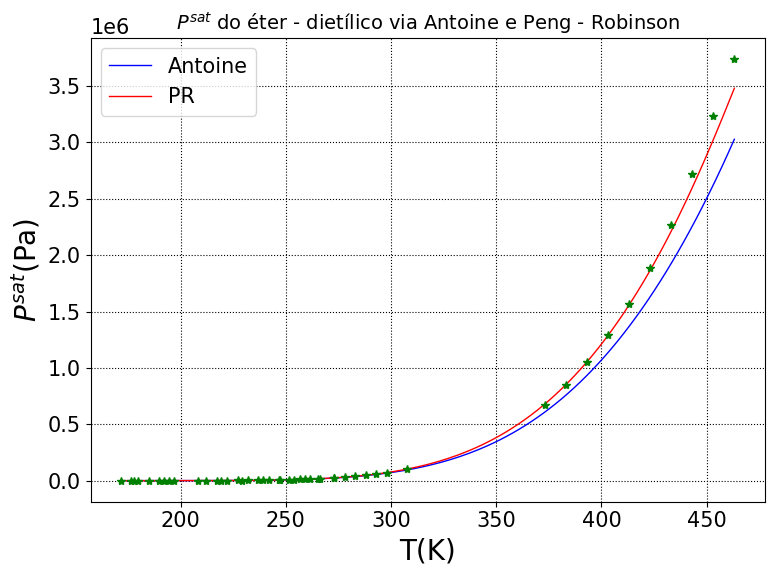

In [42]:
#Cálculo e Plot de Psat
n = 200
tcalc5  = np.linspace(tmin5,tmax5,n)
psatA5  = np.zeros(n)
psatPR5 = np.zeros(n)
for i in range(n):
    tcalc5[i],psatA5[i],psatPR5[i] = calcPressãoPRvsAn(tcalc5[i],vTcPcw5[0],vTcPcw5[1],vTcPcw5[2],Lambda5,paA5)
    
plt.figure(figsize=(8,6))
plt.plot(tcalc5,psatA5,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc5,psatPR5,color="red", linewidth=1, label = 'PR')
plt.plot(texp5,pexp5,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do éter - dietílico via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Éter Dietílico.png',dpi=600)
plt.show()

In [43]:
#Cálculo dos erros relativos médios
nexp5=len(texp5)

vpexp5=[float(x) for x in pexp5] #criando um vetor numérico (string para float)


erropsatA5  = np.zeros(nexp5)
erropsatPR5 = np.zeros(nexp5)

erromedioPR=0;
erromedioA=0;

for i in range(nexp5):
    tcalc,psatA,psatPR = calcPressãoPRvsAn(texp5[i],vTcPcw5[0],vTcPcw5[1],vTcPcw5[2],Lambda5,paA5)
    erropsatA5[i]=abs(vpexp5[i]-psatA)/vpexp5[i]
    erropsatPR5[i]=abs(psatPR-vpexp5[i])/vpexp5[i]
    erromedioPR=erromedioPR+erropsatPR5[i]
    erromedioA=erromedioA+erropsatA5[i]

erromedioPR=erromedioPR/nexp5
erromedioA=erromedioA/nexp5

print('erro medio Peng - Robinson (%)=',erromedioPR)
print('erro medio Antoine (%)=',erromedioA)

erro medio Peng - Robinson (%)= 0.06414707929835207
erro medio Antoine (%)= 0.1442875332611873


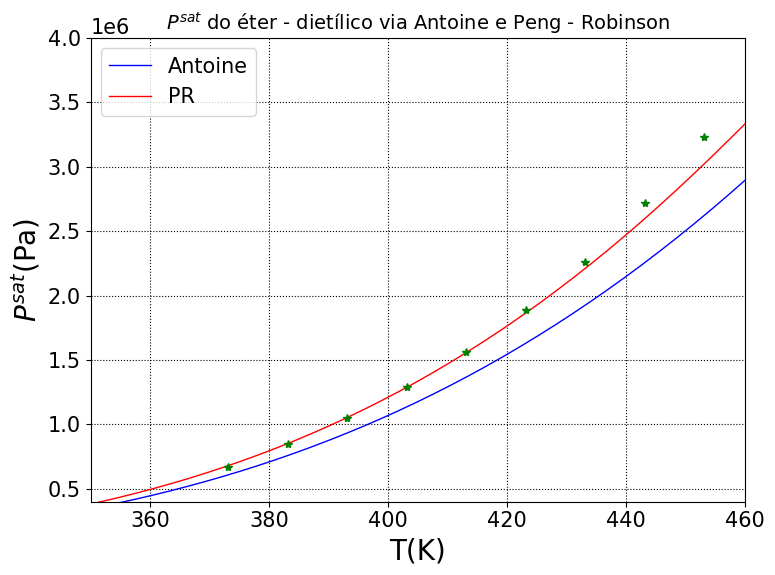

In [44]:
#Comportamento em temperaturas elevadas
plt.figure(figsize=(8,6))
plt.plot(tcalc5,psatA5,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc5,psatPR5,color="red", linewidth=1, label = 'PR')
plt.plot(texp5,pexp5,color="green", marker = "*", linewidth=0)
plt.xlim([350,460])
plt.ylim([0.4E6,4E6])
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do éter - dietílico via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Éter Dietílico - T elevada.png',dpi=600)
plt.show()

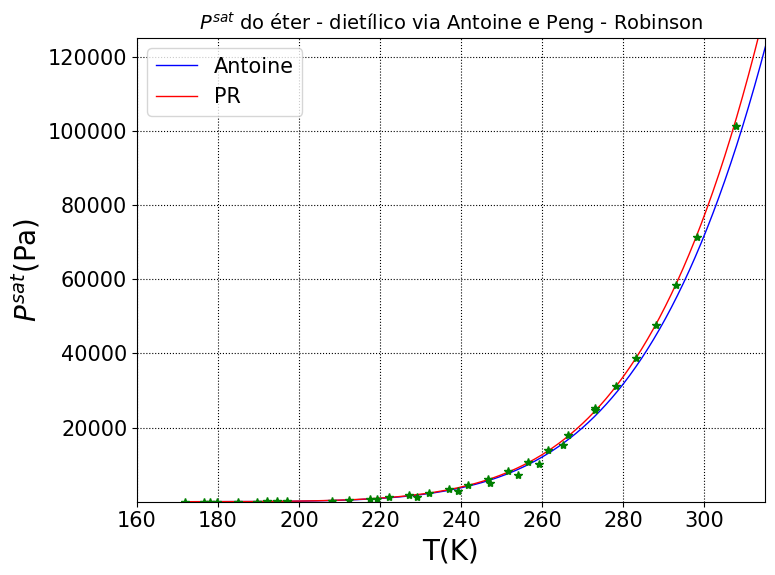

In [45]:
#Comportamento em baixas temperaturas
plt.figure(figsize=(8,6))
plt.plot(tcalc5,psatA5,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc5,psatPR5,color="red", linewidth=1, label = 'PR')
plt.plot(texp5,pexp5,color="green", marker = "*", linewidth=0)
plt.xlim([160,315])
plt.ylim([0.0000005E6,125000])
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do éter - dietílico via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Éter Dietílico - T baixa.png',dpi=600)
plt.show()

### Modelagem de Psat para o metanol

In [46]:
#Extraindo parâmetros das listas de dados para o metanol
pexp6 = StrAFloatList(PsatMetanol[:,1])
pexp6 = [x * 1000 for x in pexp6]

texp6 = StrAFloatList(PsatMetanol[:,0])

nexp6 = len(texp6)

tmin6 = float(PsatMetanol[0][0])
tmax6 = float(PsatMetanol[nexp6-1][0])

paA6  = StrAFloatList(Antoine[6][0:3])
Lambda6 = StrAFloatList(Lambda[6][0:3])
vTcPcw6 = StrAFloatList(vTcPcw[6][0:3])

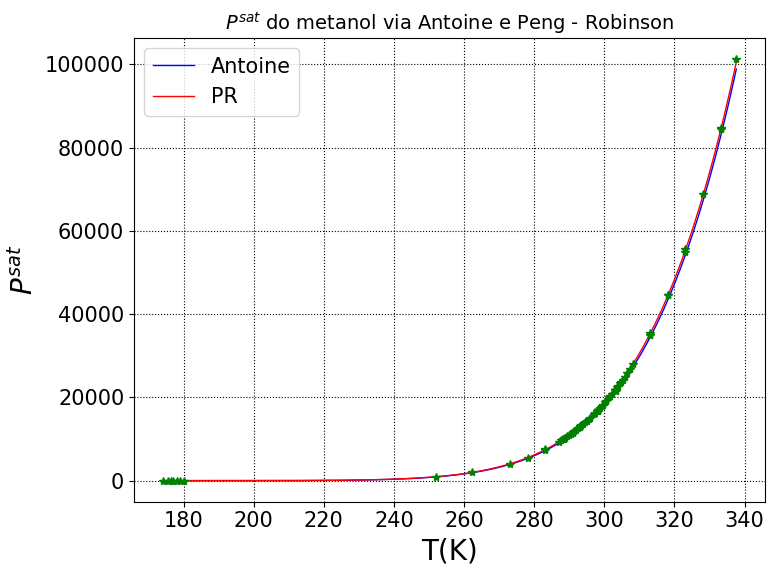

In [47]:
#Cálculo e plot de Psat
n = 200
tcalc6  = np.linspace(tmin6,tmax6,n)
psatA6  = np.zeros(n)
psatPR6 = np.zeros(n)
for i in range(n):
    tcalc6[i],psatA6[i],psatPR6[i] = calcPressãoPRvsAn(tcalc6[i],vTcPcw6[0],vTcPcw6[1],vTcPcw6[2],Lambda6,paA6)
    
plt.figure(figsize=(8,6))
plt.plot(tcalc6,psatA6,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc6,psatPR6,color="red", linewidth=1, label = 'PR')
plt.plot(texp6,pexp6,color="green", marker = "*", linewidth=0)
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$',fontsize=20)
plt.title('$P^{sat}$ do metanol via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Metanol.png',dpi=600)
plt.show()

In [48]:
#Cálculo dos erros relativos médios
nexp6=len(texp6)

vpexp6=[float(x) for x in pexp6] #criando um vetor numérico (string para float)


erropsatA6  = np.zeros(nexp6)
erropsatPR6 = np.zeros(nexp6)

erromedioPR=0;
erromedioA=0;

for i in range(nexp6):
    tcalc,psatA,psatPR = calcPressãoPRvsAn(texp6[i],vTcPcw6[0],vTcPcw6[1],vTcPcw6[2],Lambda6,paA6)
    erropsatA6[i]=abs(vpexp6[i]-psatA)/vpexp6[i]
    erropsatPR6[i]=abs(psatPR-vpexp6[i])/vpexp6[i]
    erromedioPR=erromedioPR+erropsatPR6[i]
    erromedioA=erromedioA+erropsatA6[i]

erromedioPR=erromedioPR/nexp6
erromedioA=erromedioA/nexp6

print('erro medio Peng - Robinson=',erromedioPR)
print('erro medio Antoine=',erromedioA)

erro medio Peng - Robinson= 0.006547481963541903
erro medio Antoine= 0.059606427280721914


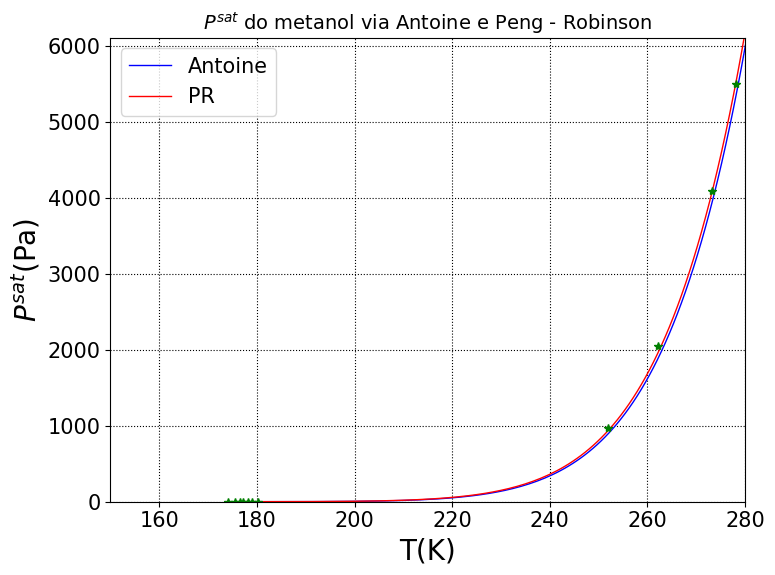

In [49]:
#Comportamento em temperaturas baixas
plt.figure(figsize=(8,6))
plt.plot(tcalc6,psatA6,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc6,psatPR6,color="red", linewidth=1, label = 'PR')
plt.plot(texp6,pexp6,color="green", marker = "*", linewidth=0)
plt.xlim([150,280])
plt.ylim([0,6100])
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do metanol via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat metanol - T baixa.png',dpi=600)
plt.show()

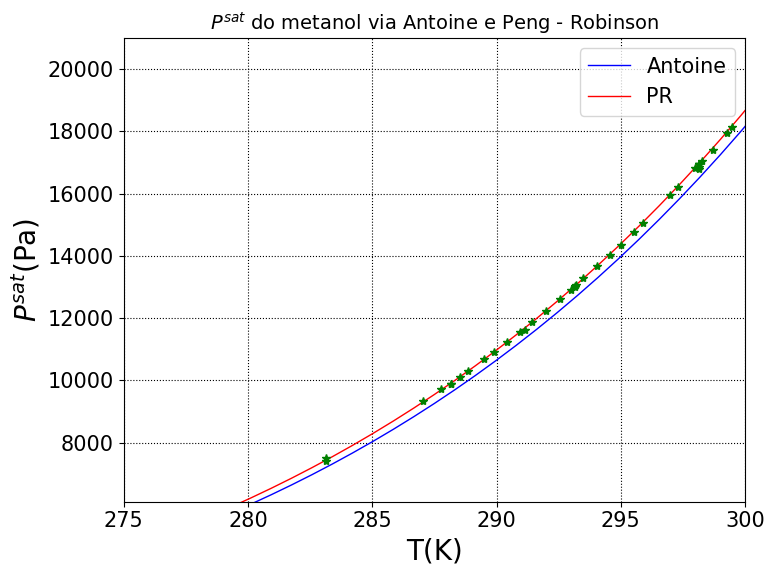

In [50]:
#Comportamento em temperaturas medianas
plt.figure(figsize=(8,6))
plt.plot(tcalc6,psatA6,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc6,psatPR6,color="red", linewidth=1, label = 'PR')
plt.plot(texp6,pexp6,color="green", marker = "*", linewidth=0)
plt.xlim([275,300])
plt.ylim([6100,21000])
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do metanol via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat Éter Dietílico - T baixa.png',dpi=600)
plt.show()

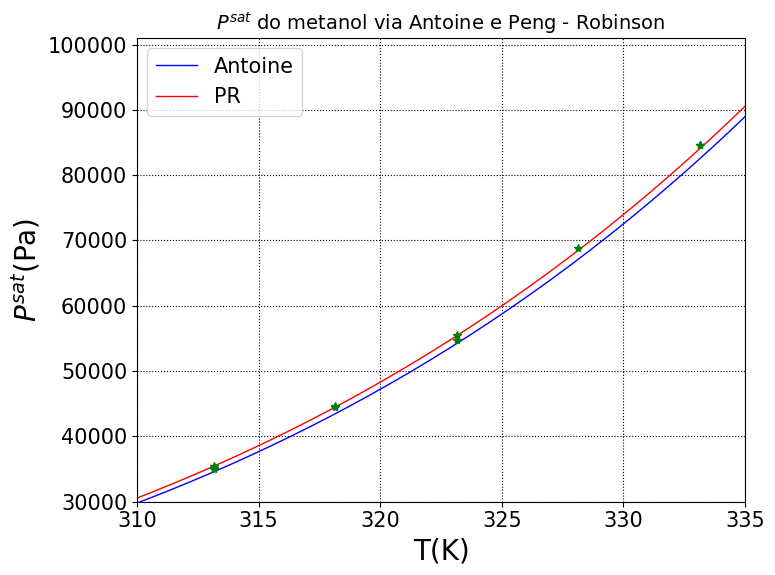

In [51]:
#Comportamento em temperaturas elevadas
plt.figure(figsize=(8,6))
plt.plot(tcalc6,psatA6,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc6,psatPR6,color="red", linewidth=1, label = 'PR')
plt.plot(texp6,pexp6,color="green", marker = "*", linewidth=0)
plt.xlim([310,335])
plt.ylim([30000,101000])
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do metanol via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat metanol - T baixa.png',dpi=600)
plt.show()

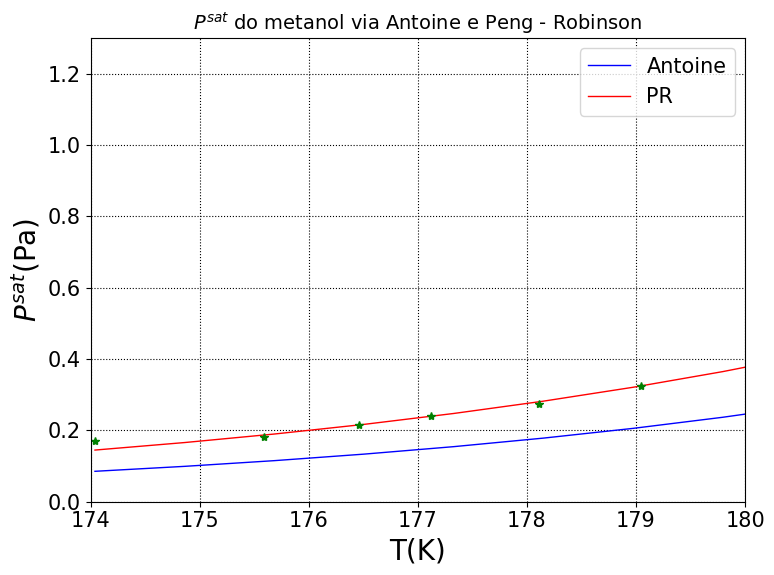

In [52]:
#Comportamento em baixas temperaturas - 2
plt.figure(figsize=(8,6))
plt.plot(tcalc6,psatA6,color="blue", linewidth=1, label = 'Antoine')
plt.plot(tcalc6,psatPR6,color="red", linewidth=1, label = 'PR')
plt.plot(texp6,pexp6,color="green", marker = "*", linewidth=0)
plt.xlim([174,180])
plt.ylim([0,1.3])
plt.xlabel('T(K)',fontsize=20)
plt.ylabel('$P^{sat}$(Pa)',fontsize=20)
plt.title('$P^{sat}$ do metanol via Antoine e Peng - Robinson', fontsize = 14)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.grid(True, color='k', linestyle=':')
plt.tight_layout()
plt.savefig('Pressão Sat metanol - T baixa.png',dpi=600)
plt.show()